In [ ]:
Naive Bayes Implementation for Research

{1e-09: 0.5851571428571429, 1e-08: 0.5851285714285714, 1e-07: 0.5851142857142857}
[1e-09, 1e-08, 1e-07]
[0.5851571428571429, 0.5851285714285714, 0.5851142857142857]


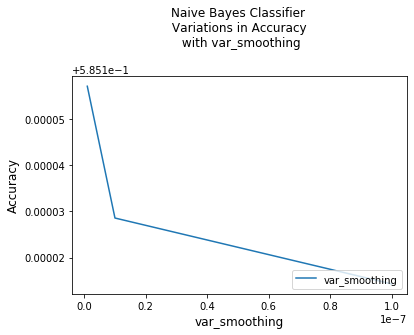

Maximum Depth 1e-09 ----> Accuracy Score = 0.5851571428571429
Maximum Depth 1e-08 ----> Accuracy Score = 0.5851285714285714
Maximum Depth 1e-07 ----> Accuracy Score = 0.5851142857142857


In [1]:
"""
Naive Bayes

"""

import pandas as pd
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class Naive():
    def __init__(self):
        self.smooth = [1e-9, 1e-8, 1e-7]
    
    def dataset_split(self):
        df = pd.read_csv("cardio_preprocessed.csv")  
        X = df.drop('cardio',axis=1)
        y = df.cardio
        return X,y

    def model_creation(self):
        acc_score = {}
        for i in self.smooth:
            #acc = []
            kfold = model_selection.KFold(n_splits=5)
            model = GaussianNB(var_smoothing=i)
            results = model_selection.cross_val_score(model, X, y, cv=kfold)
            #accuracy_score = results.mean()
            #acc.append(results.mean())
            acc_score[i] = results.mean()
            
        print(acc_score)
        return acc_score
    
    def graph(self, acc_score):
        names = list(acc_score.keys())
        values = list(acc_score.values())
        print(names)
        print(values)
        plt.plot(names,values)
        plt.title("Naive Bayes Classifier \n Variations in Accuracy \n with var_smoothing", pad=30)
        plt.ylabel("Accuracy", fontsize = "large")
        plt.xlabel('var_smoothing', fontsize = "large")
        plt.legend(["var_smoothing"], loc='lower right')
        plt.show()
        
        #print("\n",acc_score)
        #print("\nOverall Accuracy Score for Decision Tree = ",np.mean(acc_score))


nn = Naive()
X,y = nn.dataset_split()
acc_score = nn.model_creation()
nn.graph(acc_score)


for x,y in acc_score.items():
    print("Maximum Depth {0} ----> Accuracy Score = {1}". format (x, np.mean(acc_score[x])) )